Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Mohamed Abdelaziz | K12137202 | 19.11.2021

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 2 -- Reading, handling and visualization of datasets </h2>

<b>Authors:</b> Brandstetter, Schäfl, Parada-Cabaleiro, Schörgenhumer<br>
<b>Date:</b> 18-10-2021

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

In [116]:
# Required packages and the u2_utils file
import u2_utils as u2
import IPython.display as ipd
import numpy as np
import spacy
from matplotlib.image import imread

u2.check_module_versions()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.21.1 (✓)
Installed pandas version: 1.3.1 (✓)
Installed scikit-learn version: 1.0 (✓)
Installed matplotlib version: 3.4.3 (✓)
Installed scipy version: 1.7.1 (✓)
Installed spacy version: 3.1.3 (✓)


# Exercise 1

Following the instructions given in the lecture notebook, perform the tasks below:

- Plot the image of a tulip named `flower.jpg` (you will find this image in the folder `resources`)
- Load the image and print its dimensions (you will see that height and length/width are different to those from the image used in the lecture notebook)

**1.1. Plot the flower image.**

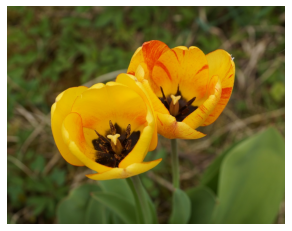

In [117]:
image_path = "resources/flower.jpg"
u2.plot_image(image_path)

**1.2. Load and print the image's dimensions.**

In [118]:
img = imread(image_path)
print(img.shape)

(650, 830, 3)


# Exercise 2

By using the functions from `u2_utils.py` and working with the flower image, perform the tasks below:

- Plot the image with a transparency of 35% 
- Plot the image by flipping it horizontally
- Plot the histograms for each color channel in the image and try to find the good **color threshold** values to segment the image into flower and background

**2.1. Plot with transparency = 35%.**

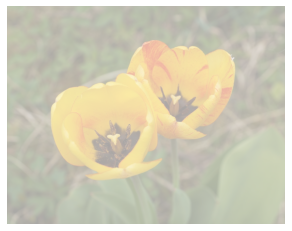

In [119]:
u2.plot_image_rgba(image_path, alpha=0.35)

**2.2. Plot horizontally flipped image.**

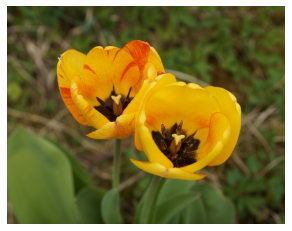

In [120]:
u2.plot_flipped_image(image_path, flipping="horizontal")

**2.3. Plot RGB channels and histograms.**

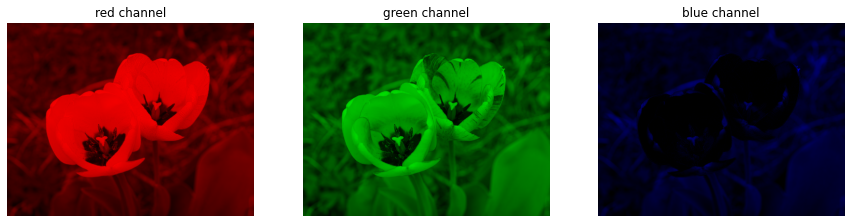

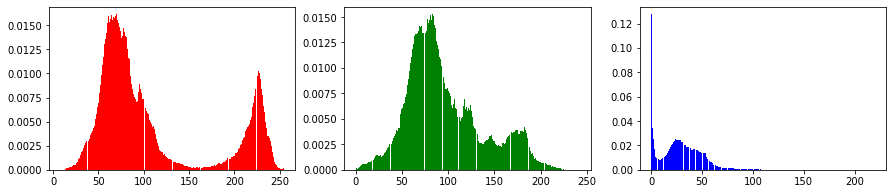

In [121]:
u2.plot_image_channels_rgb(image_path)
u2.plot_color_histograms(image_path)

**2.4. Segment the image.**

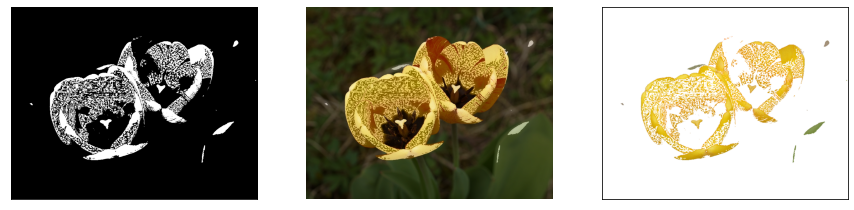

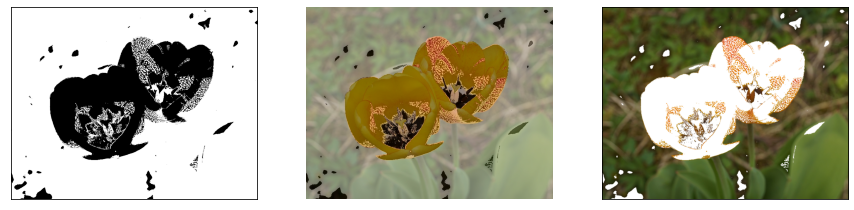

In [123]:
u2.segment_image(image_path, lower_threshold_g=135, lower_threshold_b=1)
u2.segment_image(image_path, lower_threshold_g=35, upper_threshold_g=135, lower_threshold_b=1)

# Exercise 3

With the functions from the file `u2_utils.py`, as shown in the lecture notebook, perform the tasks below:

- Generate three sine waves (all of them with a duration of 1 second, at a sampling rate of 24000 Hz) with the following frequencies: 349.228 Hz, 440 Hz and 523.251 Hz (in music terms, this is called an F major chord, here with the notes F4, A4 and C5). Then, add them together into a complex sound, plot the wave with `u2.plot_wave(...)` and generate a player to listen to it
- Use the `u2.apply_fourier_transform(...)` function to apply the discrete Fourier transform (DFT) to this complex sound and plot the output, i.e., decompose the complex sound into the original sine waves. Choose a meaningful maximum frequency when plotting the spectrum.

**3.1. Generate three sine waves, sum them up, plot the combined wave and generate a player to listen to the complex sound.**

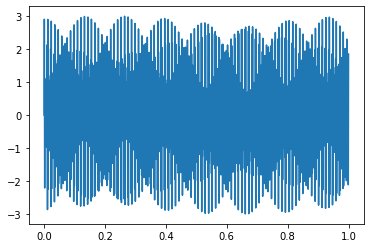

In [124]:
# Duration
T = 1
# Sampling Rate
sampling_rate = 24000

# Frequencies
f1 = 349.228
f2 = 440
f3 = 523.251

# Wave Points
wp_1 = u2.generate_wave(f1, T, sampling_rate)
wp_2 = u2.generate_wave(f2, T, sampling_rate)
wp_3 = u2.generate_wave(f3, T, sampling_rate)

# Combines Wave Points
wp = wp_1 + wp_2 + wp_3

# Plotting the wave
u2.plot_wave(wp, T, sampling_rate)
ipd.Audio(wp, rate=sampling_rate)

**3.2. Compute the discrete Fourier transform and plot the output.**

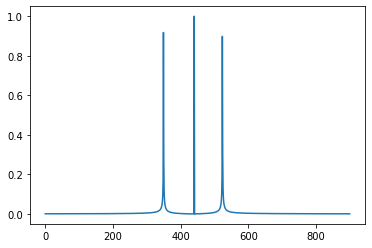

In [125]:
fourier = u2.apply_fourier_transform(wp)
u2.plot_spectrum(fourier, sampling_rate, max_freq=900)

# Exercise 4

By using the functions `u2.read_wav_file(...)` and `u2.apply_fourier_transform(...)` from `u2_utils.py`, perform the task below:

- Read the audio file named `audio.wav` from the `resources` folder.
- Apply Fourier analysis and plot the Fourier spectrum.
- Identify the frequencies of the two hidden sine waves. Hint, adapt `max_freq` from the `u2.plot_spectrum(...)` function.

**4.1. Read audio file, apply Fourier analysis and plot the resulting spectrum.**

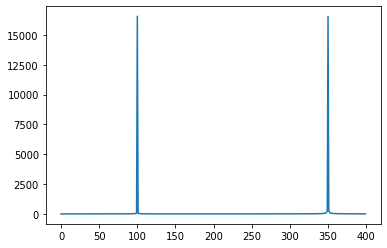

In [126]:
audio_file = "resources/audio.wav"
T = 1
wp_audio, sampling_rate_audio = u2.read_wav_file(audio_file, time=T)

# u2.plot_wave(wp_audio, T, sampling_rate_audio)
# ipd.Audio(wp_audio, rate=sampling_rate_audio)

fourier_audio = u2.apply_fourier_transform(wp_audio)
u2.plot_spectrum(fourier_audio, sampling_rate_audio, max_freq=400)

**4.2. What are the two frequencies?**

Frequencies = (100,350)

# Exercise 5

Following the instructions given in the lecture notebook, perform the tasks below:

- Download the word embedding model and load it by using the `spacy` library 
- Evaluate which two words have a higher similarity: "notebook" and "pen" or "cable" and "waterfall". Then, print out the result. Hint: You could use an if/else statement to make the comparison (feel free to investigate this option on the internet). Otherwise, simply evaluate both similarities manually and print the higher one.

**5.1. Download and load the word embedding.**

In [127]:
# Download Worf Embedding
!python -m spacy download en_core_web_md
# Load Embedding
word_embedding = spacy.load('en_core_web_md')

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


You should consider upgrading via the 'C:\Users\moham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


**5.2. Evaluate similarity: "notebook" and "pen" vs. "cable" and "waterfall".**

In [132]:
# initialize Variables
notebook = word_embedding('notebook')
pen = word_embedding('pen')
cable = word_embedding('cable')
waterfall = word_embedding('waterfall')

# Similarity
notebook.similarity(pen)
cable.similarity(waterfall)

0.11750528297547742

# Exercise 6

With the functions from the file `u2_utils.py`, including `u2.apply_tsne(...)`, i.e., the function to apply the t-SNE algorithm for dimensionality reduction already described in the first lecture, perform the tasks below:

- Following the example given in the lecture notebook, create a list containing these words: "car", "cloud", "dark", "diesel", "exercise", "grade", "grim", "homework", "lecture", "motor", "night", "petrol", "rain", "school", "storm", "study", "teacher", "thunder", "tire", "transmission", "wheel". Hint: A list can be created with `my_list = [...]`, where `...` is the content.

- Get the embeddings of the words and display the result data frame.

- Down-project the 300-dimensional representation of each word to 2 dimensions by applying the t-SNE method, i.e., the function `u2.apply_tsne(...)`. Then, plot it in a 2D representation by using the function `u2.plot_word_embeddings_2d(...)`. Look for a fitting `perplexity` value in order to group the words into meaningful clusters. Hint: Setting the seed for the random number generator `np.random.seed(seed=...)` is not necessary but useful if you want reproducible results.

- Verify that the perplexity was correct by applying the PCA down-projection method and plotting the result in a 2D representation (this will clearly show the different clusters)

**6.1. Create a list with the indicated words.**

In [133]:
word_list = ["car", "cloud", "dark", "diesel", "exercise", "grade", "grim", "homework", "lecture", "motor", "night", "petrol", "rain", "school", "storm", "study", "teacher", "thunder", "tire", "transmission", "wheel"]

**6.2. Get embeddings and display the data frame.**

In [134]:
df_embeddings = u2.get_word_vectors(word_embedding, word_list)
df_embeddings

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
car,0.209870,0.464810,-0.242380,-0.065751,0.608560,-0.346980,-0.253310,-0.425900,-0.222770,2.29130,...,-1.192400,-0.463950,0.669840,-0.494040,0.441540,-0.436990,0.235380,0.321350,0.266490,0.224380
cloud,0.110850,-0.274010,0.497370,-0.096619,-0.419780,-0.077946,-0.227320,0.536840,-0.026613,1.32700,...,-0.370530,0.375310,0.797360,-0.157450,-0.581730,0.146610,0.430780,0.497570,0.018062,0.608700
dark,0.236970,-0.012691,0.025805,0.087690,0.004066,-0.151640,-0.317490,0.239520,-0.139930,1.53930,...,-0.704100,0.127020,0.161710,-0.562930,-0.413370,0.500250,0.540350,-0.155400,-0.100370,0.024366
diesel,0.074851,0.350290,0.190260,-0.333050,0.425360,0.359850,-0.121180,-0.346060,-0.367830,0.35300,...,-0.584740,-0.389240,0.789840,-0.370630,-0.179570,-0.200360,0.337240,0.048689,-0.129860,0.071932
exercise,-0.042700,0.278030,0.153170,-0.091364,-0.496480,0.206410,-0.417420,-0.288840,0.066963,2.19850,...,0.796880,-0.066011,0.058564,-0.656040,0.083315,-0.069140,0.564940,-0.194350,-0.000891,-0.273880
grade,-0.656050,0.483440,-0.083531,0.338010,0.095574,-0.056138,0.347310,0.291710,-0.429500,1.48490,...,0.432600,-0.057419,-0.026134,0.498960,0.313360,0.458440,-0.554270,-0.226080,0.265790,-0.154570
grim,0.187990,-0.031330,0.245440,0.014962,-0.288610,-0.296700,0.042305,0.400510,0.236950,1.94630,...,-0.520340,0.261030,0.269620,0.251900,-0.122300,0.469210,0.289100,0.097077,-0.123580,-0.354200
homework,-0.537830,0.123420,-0.320550,0.047442,-0.489640,0.154940,0.142420,-0.194470,-0.121630,1.65370,...,0.443190,-0.014212,-0.078190,0.229690,0.865590,-0.097917,0.475740,-0.035740,0.350690,0.046469
lecture,-0.224790,0.070714,-0.029326,0.532260,-0.091217,0.113060,0.165450,-0.376670,-0.086627,2.03500,...,1.002600,0.030621,-0.140520,0.023987,0.582770,0.493740,0.731580,0.648340,-0.043805,-0.278690
motor,0.725850,0.466320,0.000849,-0.592510,-0.135420,-0.346780,0.171730,-0.583980,0.020615,0.85914,...,-0.557440,-0.613910,0.596470,-0.071942,-0.192340,-0.210260,0.287440,0.016555,-0.418120,0.197100


**6.3. Apply t-SNE and plot the resut in a 2D representation.**

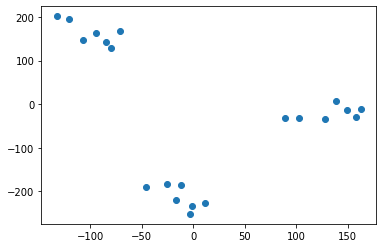

In [135]:
np.random.seed(seed=21)
embeddings_tsne = u2.apply_tsne(n_components=2, data=df_embeddings, perplexity=3.0)
u2.plot_points_2d(data=embeddings_tsne)

**6.4. Apply PCA and plot the result in a 2D representation.**

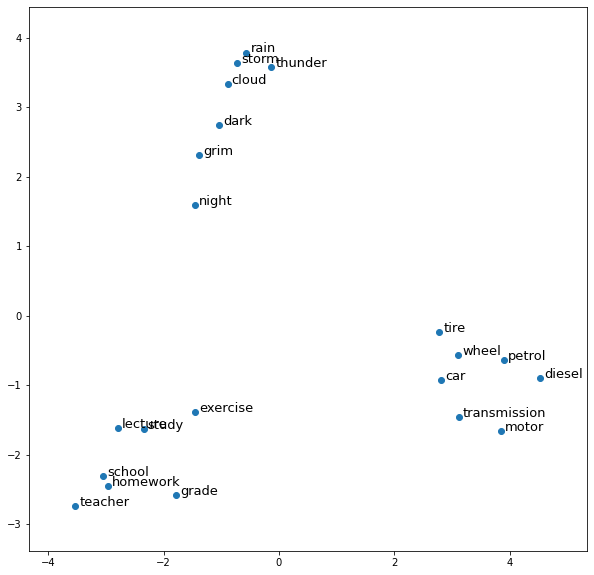

In [136]:
embeddings_pca_2d = u2.apply_pca(n_components=2, data=df_embeddings)
u2.plot_word_embeddings_2d(embeddings_pca_2d)